# M4 - WEEK 5 | PROJECT: Study Cases

Students: Ahmed Galal & Loai Siwas

The final assignment you will work on is going to be a bit different. You will combine a lot of the skills and knowledge you have built on throughout the modules and participate in a Kaggle competition.

You can select one of the following competitions: 


- If you are up for a time series challenge, have a look a 'Forecasting-Uncertainty': https://www.kaggle.com/c/m5-forecasting-uncertainty/overview
- Predict traffic congestion in 4 major US cities: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/data

Pick a competition and follow the instructions to make sure you understand the problem, data and submission requirements. Some competitions are closed but you can still submit and see how you are placed on the leader board. 


As you are building a predictive model or models, make sure you follow some of the best practices we have learned so far:
1. Clean and then visually explore your data before you start the analysis
1. Don’t just make assumptions, whenever possible, use statistical analysis to test hypotheses and find relationships in the data
1. Build and compare predictive models in terms of their performance. Note that the one is on time series, and the second- a standard supervised learning problem. Follow the best practices in each of them. 


To give you an idea of a good example project, check out this GitHub repo: https://github.com/melekaslan/DSMLBC/blob/master/7.Hafta/Diabetes%20Classification%20using%20Machine%20Learning.ipynb

Same project on Kaggle: https://www.kaggle.com/melekaslan/diabetes-classification-using-machine-learning/notebook

You don't need to follow the exact same steps in the project you choose (and not all of them will be applicable) but this should give you a good idea of how an end-to-end executed solution could look like. See how it is easy to understand & follow, and nicely presented in a storyline.

Submit your Jupyter notebook and link to a GitHub repository where you store the code, as well your Kaggle link. What is your position in the leader board?

You can work in teams of 2 to 3 people. Feel free to split the workload in different parts. Do not look at popular kernels with solutions on Kaggle, you should present your own original work. 

Good luck!

---

## Selecting the competitions
we select the "Predict traffic congestion in 4 major US cities" competition

## Importing the data and exploration

In [1]:
# Import the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df = pd.read_csv('train_Full.csv', index_col=0)
# df_test = pd.read_csv('test.csv', index_col=0)


In [3]:
# Print the first few rows of the DataFrame
df.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
RowId,,,,,,,,,,,,,,,,,,,,,
1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [4]:
df.shape # print the shape of the dataframe

(856387, 27)

In [5]:
# Print the DF info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856387 entries, 1921357 to 2777743
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   IntersectionId           856387 non-null  int64  
 1   Latitude                 856387 non-null  float64
 2   Longitude                856387 non-null  float64
 3   EntryStreetName          848239 non-null  object 
 4   ExitStreetName           850100 non-null  object 
 5   EntryHeading             856387 non-null  object 
 6   ExitHeading              856387 non-null  object 
 7   Hour                     856387 non-null  int64  
 8   Weekend                  856387 non-null  int64  
 9   Month                    856387 non-null  int64  
 10  Path                     856387 non-null  object 
 11  TotalTimeStopped_p20     856387 non-null  float64
 12  TotalTimeStopped_p40     856387 non-null  float64
 13  TotalTimeStopped_p50     856387 non-null  float64
 1

In [6]:
# print the dtype of each column
df.dtypes

IntersectionId               int64
Latitude                   float64
Longitude                  float64
EntryStreetName             object
ExitStreetName              object
EntryHeading                object
ExitHeading                 object
Hour                         int64
Weekend                      int64
Month                        int64
Path                        object
TotalTimeStopped_p20       float64
TotalTimeStopped_p40       float64
TotalTimeStopped_p50       float64
TotalTimeStopped_p60       float64
TotalTimeStopped_p80       float64
TimeFromFirstStop_p20      float64
TimeFromFirstStop_p40      float64
TimeFromFirstStop_p50      float64
TimeFromFirstStop_p60      float64
TimeFromFirstStop_p80      float64
DistanceToFirstStop_p20    float64
DistanceToFirstStop_p40    float64
DistanceToFirstStop_p50    float64
DistanceToFirstStop_p60    float64
DistanceToFirstStop_p80    float64
City                        object
dtype: object

### Some plots and data exploration  

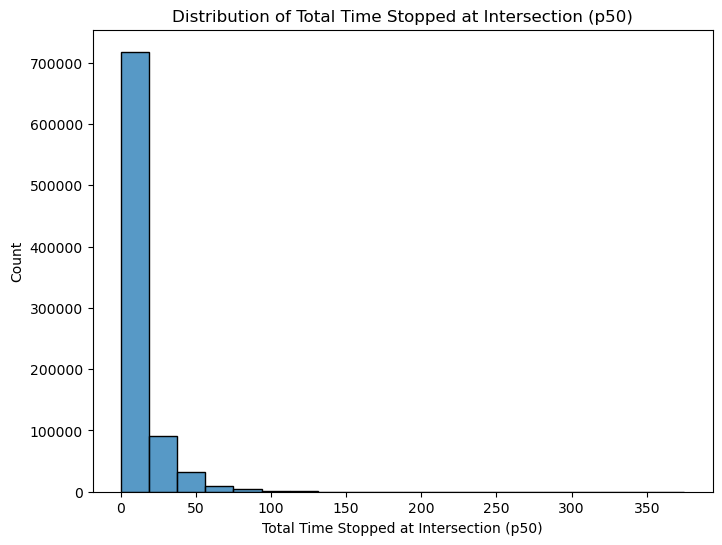

In [7]:
# Plot a histogram of TotalTimeStopped_p50
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalTimeStopped_p50', bins=20)
plt.xlabel('Total Time Stopped at Intersection (p50)')
plt.ylabel('Count')
plt.title('Distribution of Total Time Stopped at Intersection (p50)')
plt.show()

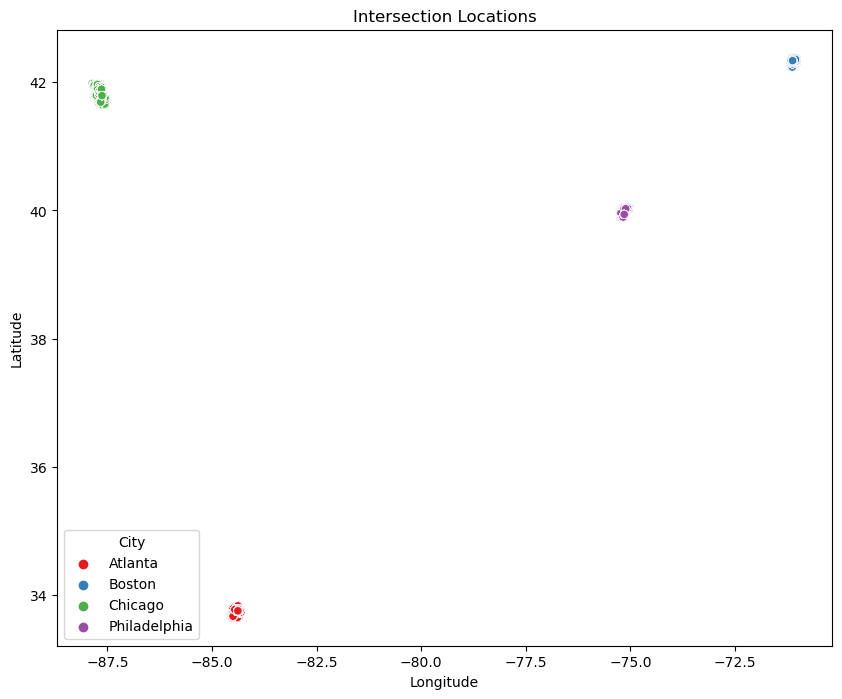

In [8]:
# Plot a scatter plot of Latitude vs. Longitude colored by City
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='City', palette='Set1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Intersection Locations')
plt.show()

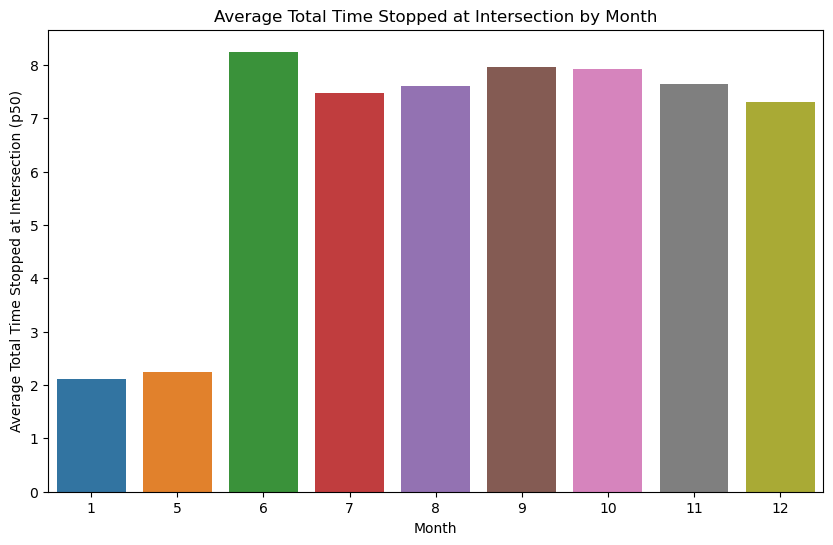

In [9]:
# Plot a bar chart of the average TotalTimeStopped_p50 by Month
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Month', y='TotalTimeStopped_p50', errorbar=None)
plt.xlabel('Month')
plt.ylabel('Average Total Time Stopped at Intersection (p50)')
plt.title('Average Total Time Stopped at Intersection by Month')
plt.show()

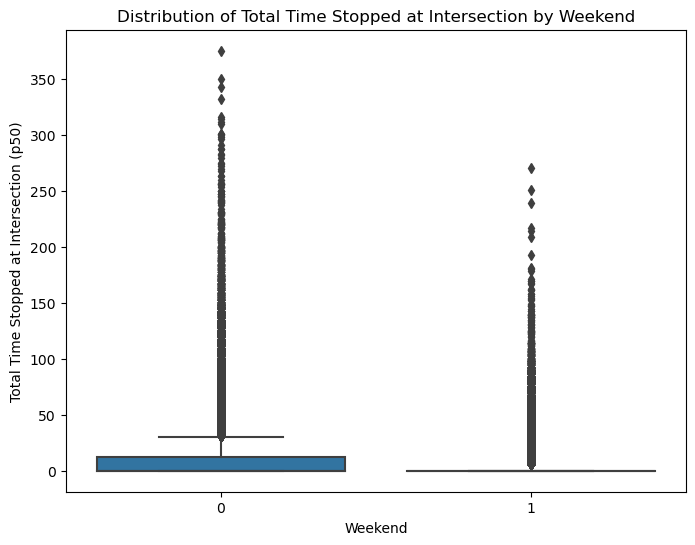

In [10]:
# Plot a box plot of TotalTimeStopped_p50 by Weekend
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Weekend', y='TotalTimeStopped_p50')
plt.xlabel('Weekend')
plt.ylabel('Total Time Stopped at Intersection (p50)')
plt.title('Distribution of Total Time Stopped at Intersection by Weekend')
plt.show()

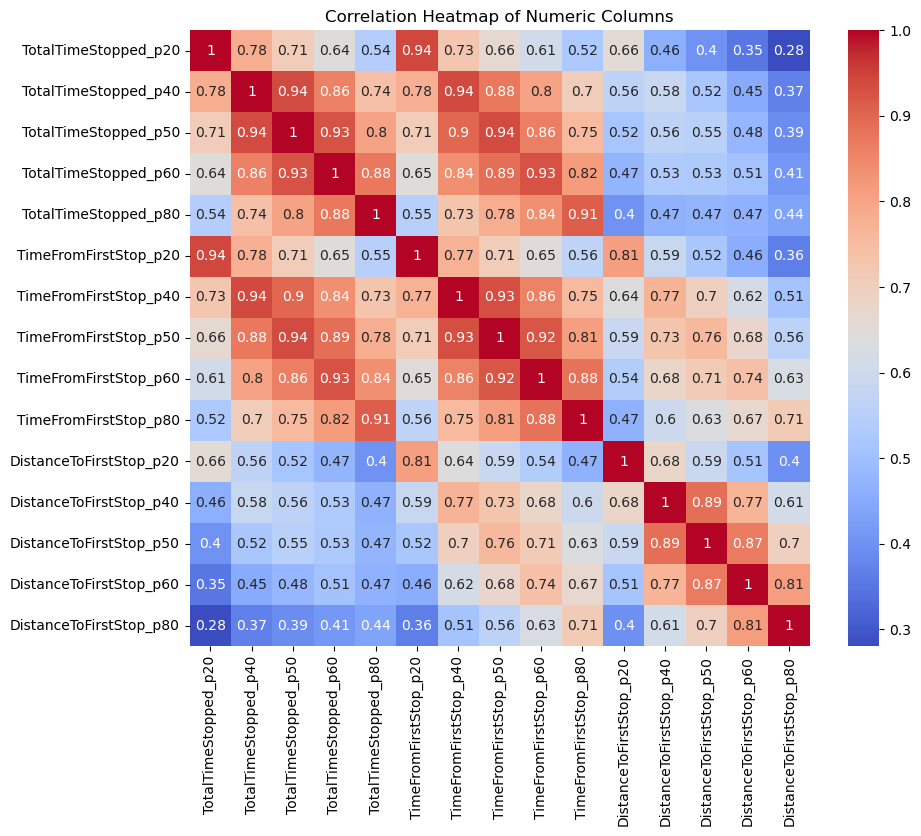

In [11]:
# Plot a correlation heatmap of numeric columns
numeric_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p40', 'TotalTimeStopped_p50', 'TotalTimeStopped_p60',
                'TotalTimeStopped_p80', 'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40', 'TimeFromFirstStop_p50',
                'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40',
                'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## Data Preprocessing

In [12]:
# Check for missing values
print(df.isnull().sum())

IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64


In [13]:
# Handle missing data
df.dropna(inplace=True)  # Remove rows with missing values

In [14]:
# Data type conversion
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [15]:
# Data normalization (example: min-max scaling)
numeric_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p40', 'TotalTimeStopped_p50', 'TotalTimeStopped_p60',
                'TotalTimeStopped_p80', 'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40', 'TimeFromFirstStop_p50',
                'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40',
                'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80']

df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

In [16]:
df.shape # print the shape of the dataframe

(842452, 27)

In [17]:
df.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
RowId,,,,,,,,,,,,,,,,,,,,,
1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


## Statistical analysis to test hypotheses 

In [18]:
import scipy.stats as stats # Import the stats module

In [19]:
# Hypothesis Test: Is there a significant difference in TotalTimeStopped_p50 between weekends and weekdays?
weekend_data = df.loc[df['Weekend'] == 1, 'TotalTimeStopped_p50']
weekday_data = df.loc[df['Weekend'] == 0, 'TotalTimeStopped_p50']

In [20]:
t_statistic, p_value = stats.ttest_ind(weekend_data, weekday_data)
alpha = 0.05  # Set the significance level

print(f'Hypothesis Test: TotalTimeStopped_p50 (Weekend vs. Weekday)')
print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

Hypothesis Test: TotalTimeStopped_p50 (Weekend vs. Weekday)
T-Statistic: -85.4235
P-value: 0.0000


In [21]:
if p_value < alpha:
    print('There is a significant difference in TotalTimeStopped_p50 between weekends and weekdays.')
else:
    print('There is no significant difference in TotalTimeStopped_p50 between weekends and weekdays.')

There is a significant difference in TotalTimeStopped_p50 between weekends and weekdays.


In [22]:
# Correlation Analysis: Calculate the correlation coefficient between TotalTimeStopped_p50 and DistanceToFirstStop_p50
correlation_coefficient, p_value = stats.pearsonr(df['TotalTimeStopped_p50'], df['DistanceToFirstStop_p50'])

In [23]:
print(f'Correlation Analysis: TotalTimeStopped_p50 and DistanceToFirstStop_p50')
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'P-value: {p_value:.4f}')

Correlation Analysis: TotalTimeStopped_p50 and DistanceToFirstStop_p50
Correlation Coefficient: 0.5515
P-value: 0.0000


In [24]:
if abs(correlation_coefficient) > 0.5 and p_value < alpha:
    print('There is a strong correlation between TotalTimeStopped_p50 and DistanceToFirstStop_p50.')
else:
    print('There is no significant correlation between TotalTimeStopped_p50 and DistanceToFirstStop_p50.')

There is a strong correlation between TotalTimeStopped_p50 and DistanceToFirstStop_p50.


---
## Build and compare predictive models 

In [25]:
df.head()

,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
RowId,,,,,,,,,,,,,,,,,,,,,
1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [26]:
df.shape # print the shape of the dataframe

(842452, 27)

In [27]:
# Categorical variable encoding (example: one-hot encoding)
categorical_cols = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Weekend', 'Month', 'City']

categorical_cols_to_remove = ['EntryStreetName', 'ExitStreetName']
other_cols_to_remove = ['IntersectionId', 'Latitude', 'Longitude', 'Path']
all_cols_to_remove = categorical_cols_to_remove + other_cols_to_remove


categorical_cols_to_dummies = ['EntryHeading', 'ExitHeading', 'Weekend', 'Month', 'City']


In [28]:
df_d = df.drop(all_cols_to_remove, axis=1)

In [29]:
df_d.shape # print the shape of the dataframe

(842452, 21)

In [30]:
df_dummies = pd.get_dummies(df_d, columns=categorical_cols_to_dummies) # One-hot encoding

In [31]:
df_dummies.shape # print the shape of the dataframe

(842452, 47)

In [32]:
# Outlier detection (example: removing outliers using z-score)
z_scores = (df_dummies[numeric_cols] - df_dummies[numeric_cols].mean()) / df_dummies[numeric_cols].std()
df_dummies = df_dummies[(z_scores < 3).all(axis=1)]  # Keep rows with z-score less than 3

In [33]:
df_dummies.shape # print the shape of the dataframe

(784178, 47)

In [34]:
# print the dtype of each column
df_dummies.dtypes

Hour                         int64
TotalTimeStopped_p20       float64
TotalTimeStopped_p40       float64
TotalTimeStopped_p50       float64
TotalTimeStopped_p60       float64
TotalTimeStopped_p80       float64
TimeFromFirstStop_p20      float64
TimeFromFirstStop_p40      float64
TimeFromFirstStop_p50      float64
TimeFromFirstStop_p60      float64
TimeFromFirstStop_p80      float64
DistanceToFirstStop_p20    float64
DistanceToFirstStop_p40    float64
DistanceToFirstStop_p50    float64
DistanceToFirstStop_p60    float64
DistanceToFirstStop_p80    float64
EntryHeading_E               uint8
EntryHeading_N               uint8
EntryHeading_NE              uint8
EntryHeading_NW              uint8
EntryHeading_S               uint8
EntryHeading_SE              uint8
EntryHeading_SW              uint8
EntryHeading_W               uint8
ExitHeading_E                uint8
ExitHeading_N                uint8
ExitHeading_NE               uint8
ExitHeading_NW               uint8
ExitHeading_S       

In [35]:
# Print the cleaned and preprocessed dataset
df_dummies.head()

,Hour,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,...,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia
RowId,,,,,,,,,,,,,,,,,,,,,
1921357,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1921358,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1921359,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1921360,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1921361,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


#### Split the Data

In [36]:
# importing libraries
from sklearn.model_selection import train_test_split

In [37]:
# Split the dataset into training and testing sets
X = df_dummies.drop('TotalTimeStopped_p50', axis=1)  # Features (input variables)
y = df_dummies['TotalTimeStopped_p50']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Choose Evaluation Metrics

In [38]:
# importing libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
# Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2': r2}


#### Choose and Train Models

In [40]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [41]:
# Initialize models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()
model_nn = MLPRegressor()

Train models:

In [42]:
model_lr.fit(X_train, y_train) # Train linear regression model

LinearRegression()

In [43]:
model_dt.fit(X_train, y_train) # Train decision tree model

DecisionTreeRegressor()

In [44]:
model_rf.fit(X_train, y_train) # Train random forest model

RandomForestRegressor()

In [45]:
model_gb.fit(X_train, y_train) # Train gradient boosting model

GradientBoostingRegressor()

In [46]:
model_nn.fit(X_train, y_train) # Train neural network model

MLPRegressor()

#### Make Predictions and Evaluate

In [47]:
# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_nn = model_nn.predict(X_test)


In [48]:
# Evaluate model performance
print('Linear Regression:')
print(evaluate(y_test, y_pred_lr))

print('Decision Tree:')
print(evaluate(y_test, y_pred_dt))

print('Random Forest:')
print(evaluate(y_test, y_pred_rf))

print('Gradient Boosting:')
print(evaluate(y_test, y_pred_gb))

print('Neural Network:')
print(evaluate(y_test, y_pred_nn))

Linear Regression:
{'MSE': 2.3211149940913295e-05, 'RMSE': 0.004817795132725477, 'MAE': 0.0020225087252252892, 'R^2': 0.9665614377789212}
Decision Tree:
{'MSE': 3.2750031880435605e-05, 'RMSE': 0.005722764356535712, 'MAE': 0.0018750456952910473, 'R^2': 0.952819486257079}
Random Forest:
{'MSE': 1.6354903827635943e-05, 'RMSE': 0.004044119660400264, 'MAE': 0.001391676570855331, 'R^2': 0.9764387171401536}
Gradient Boosting:
{'MSE': 1.8569819322341652e-05, 'RMSE': 0.00430927132150456, 'MAE': 0.0016030173007863023, 'R^2': 0.9732478545688168}
Neural Network:
{'MSE': 4.2042349480820634e-05, 'RMSE': 0.006484007208572538, 'MAE': 0.00496828272367553, 'R^2': 0.9394327414792685}


#### Compare Model Performance

1. Linear Regression:
    - MSE: 2.3211149940913295e-05
    - RMSE: 0.004817795132725477
    - MAE: 0.0020225087252252892
    - R^2: 0.9665614377789212

1. Decision Tree:
    - MSE: 3.291289698226881e-05
    - RMSE: 0.005736976292636114
    - MAE: 0.0018764739388065675
    - R^2: 0.9525848587243995

1. Random Forest:
    - MSE: 1.6372712759258785e-05
    - RMSE: 0.004046320891780432
    - MAE: 0.0013922011102893044
    - R^2: 0.9764130611485429

1. Gradient Boosting:
    - MSE: 1.8569819322341652e-05
    - RMSE: 0.00430927132150456
    - MAE: 0.0016030173007862746
    - R^2: 0.9732478545688168

1. Neural Network:
    - MSE: 3.0337751724312224e-05
    - RMSE: 0.005507971652460843
    - MAE: 0.0033230845256851916
    - R^2: 0.9562946772881371

Based on the results, we can draw the following conclusions:

- The Random Forest model has the lowest MSE, RMSE, and MAE values, indicating it has the best overall performance in terms of accuracy and precision.
- The Gradient Boosting model has slightly higher MSE, RMSE, and MAE values compared to the Random Forest model but still performs well.
- The Linear Regression and Neural Network models have higher MSE, RMSE, and MAE values compared to the Random Forest and Gradient Boosting models, indicating slightly lower performance.
- The Decision Tree model has the highest MSE, RMSE, and MAE values among all the models, indicating comparatively lower performance.

---

# End of Assignment

Students: Ahmed Galal & Loai Siwas